In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv("flight data.csv")
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df_train.shape

(10683, 11)

In [4]:
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
df_test = pd.read_csv("flight test.csv")

## Combine Data for Feature Engineering

In [6]:
df_total = df_train.append(df_test, sort = False)

C:\Users\ribad\AppData\Local\Temp\ipykernel_7264\2904732517.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_train.append(df_test, sort = False)


In [7]:
df_total.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [8]:
df_total.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [9]:
df_total.shape

(13354, 11)

### Understanding our Data

#### Size of training set: 10683 records

#### Size of test set: 2671 records

### FEATURES: 

#### Airline: The name of the airline.

#### Date_of_Journey: The date of the journey

#### Source: The source from which the service begins.

#### Destination: The destination where the service ends.

#### Route: The route taken by the flight to reach the destination.

#### Dep_Time: The time when the journey starts from the source.

#### Arrival_Time: Time of arrival at the destination.

#### Duration: Total duration of the flight.

#### Total_Stops: Total stops between the source and destination.

#### Additional_Info: Additional information about the flight

#### Price: The price of the ticket

### Data Analysis

#### We will be doing this on our Train data only

In [10]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

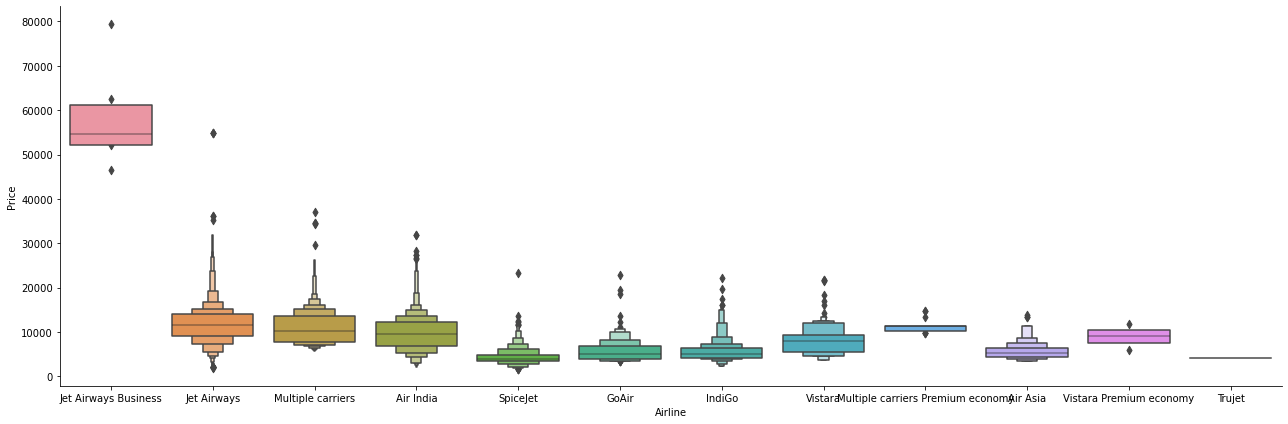

In [11]:
sns.catplot(y='Price',x='Airline',data= df_train.sort_values('Price',ascending=False),kind="boxen", height=6, aspect=3)
plt.show

# Source and Price

In [12]:
df_train['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

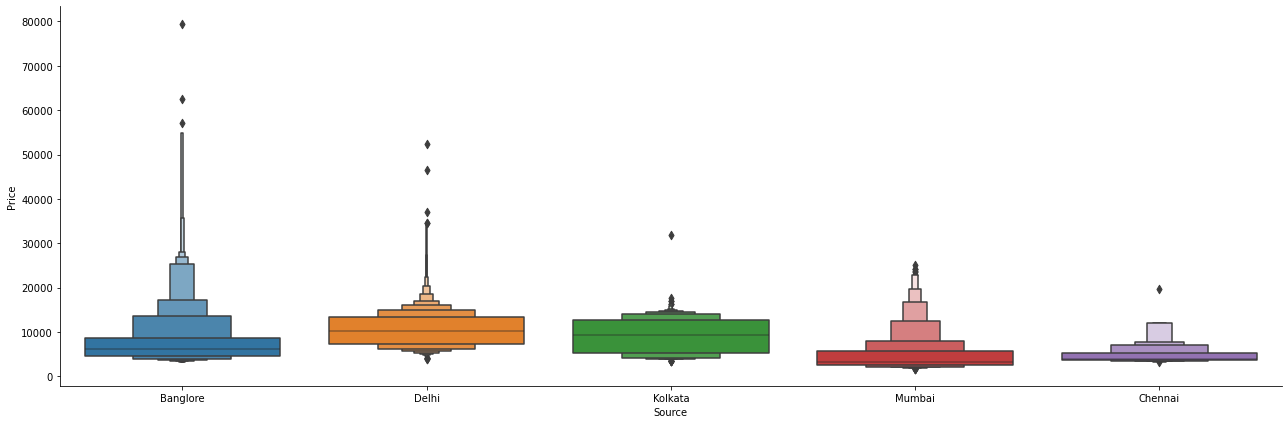

In [13]:
sns.catplot(y='Price',x='Source',data= df_train.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

#### Destination and Price

In [14]:
df_train['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

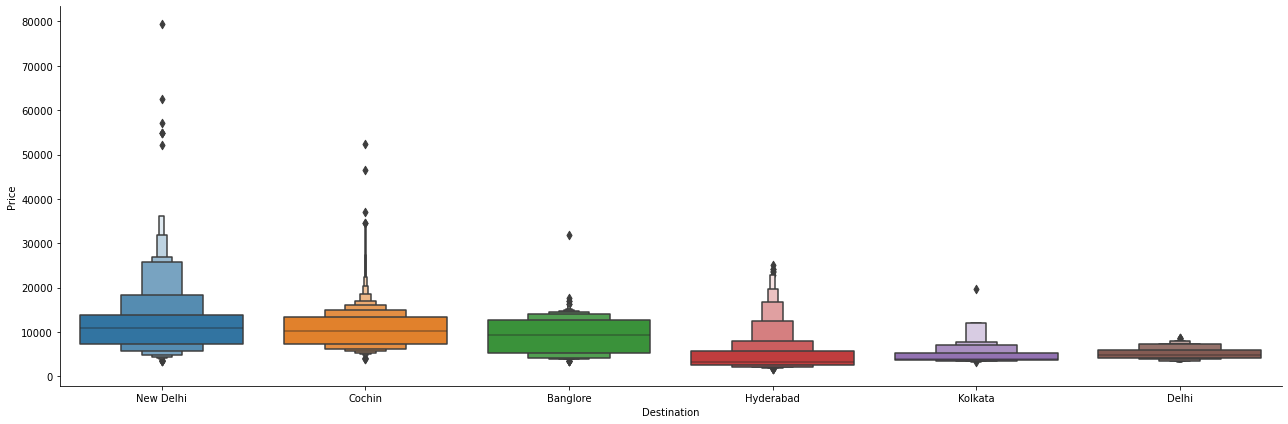

In [15]:
sns.catplot(y='Price',x='Destination',data= df_train.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [16]:
df_total['Date'] = df_total['Date_of_Journey'].str.split('/').str[0]
df_total['Month'] = df_total['Date_of_Journey'].str.split('/').str[1]
df_total['Year'] = df_total['Date_of_Journey'].str.split('/').str[2]

In [17]:
df_total.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [18]:
df_total=df_total.drop(['Date_of_Journey'],axis=1)
df_total.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [19]:
df_total['Date']=df_total['Date'].astype(int)
df_total['Month']=df_total['Month'].astype(int)
df_total['Year']=df_total['Year'].astype(int)
df_total.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [20]:
df_total.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


# Additional Info and Price

In [21]:
df_train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

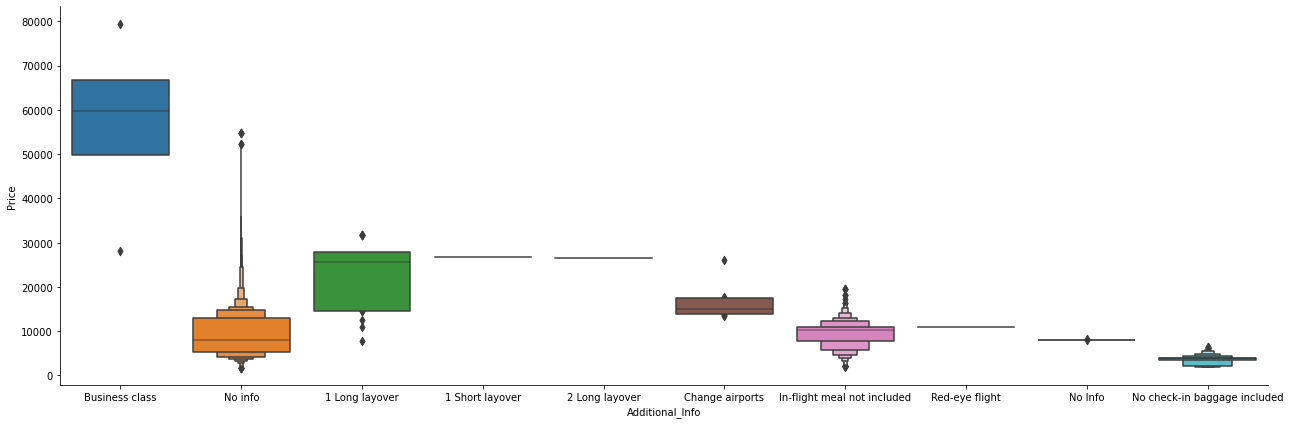

In [22]:
sns.catplot(y='Price',x='Additional_Info',data= df_train.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

### Filtering the Arrival Time

In [23]:
df_total['Arrival_Time']=df_total['Arrival_Time'].str.split(' ').str[0]
df_total.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


### Let's anlyse our Stop coloumn

In [24]:
df_total['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [25]:
df_total['Total_Stops']=df_total['Total_Stops'].fillna('1 stop')

In [26]:
df_total['Total_Stops'].isnull().sum()

0

### Let us make the Stop column numeric

In [27]:
df_total['Total_Stops']=df_total['Total_Stops'].replace('non-stop','0 stop')
df_total.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [28]:
df_total['Stop'] = df_total['Total_Stops'].str.split(' ').str[0]
df_total.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [29]:
df_total=df_total.drop(['Total_Stops'],axis=1)
df_total.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1


In [30]:
df_total.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stop                object
dtype: object

In [31]:
df_total['Stop']=df_total['Stop'].astype(int)
df_total.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stop                 int32
dtype: object

### Similarly we will try to convert all the features to numerical variables

In [32]:
df_total['Arrival_Hour'] = df_total['Arrival_Time'] .str.split(':').str[0]
df_total['Arrival_Minute'] = df_total['Arrival_Time'] .str.split(':').str[1]

In [33]:
df_total['Arrival_Hour']=df_total['Arrival_Hour'].astype(int)
df_total['Arrival_Minute']=df_total['Arrival_Minute'].astype(int)
df_total=df_total.drop(['Arrival_Time'],axis=1)
df_total.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897.0,24,3,2019,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662.0,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882.0,9,6,2019,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218.0,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302.0,1,3,2019,1,21,35


In [34]:
df_total['Departure_Hour'] = df_total['Dep_Time'] .str.split(':').str[0]
df_total['Departure_Minute'] = df_total['Dep_Time'] .str.split(':').str[1]

In [35]:
df_total['Departure_Hour']=df_total['Departure_Hour'].astype(int)
df_total['Departure_Minute']=df_total['Departure_Minute'].astype(int)
df_total=df_total.drop(['Dep_Time'],axis=1)
df_total.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50


### Let's devide the route into different columns

In [36]:
df_total['Route_1']= df_total['Route'].str.split('→ ').str[0]
df_total['Route_2']= df_total['Route'].str.split('→ ').str[1]
df_total['Route_3']= df_total['Route'].str.split('→ ').str[2]
df_total['Route_4']= df_total['Route'].str.split('→ ').str[3]
df_total['Route_5']= df_total['Route'].str.split('→ ').str[4]

In [37]:
df_total['Route_1'].fillna("None",inplace=True)
df_total['Route_2'].fillna("None",inplace=True)
df_total['Route_3'].fillna("None",inplace=True)
df_total['Route_4'].fillna("None",inplace=True)
df_total['Route_5'].fillna("None",inplace=True)
df_total.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [38]:
df_total= df_total.drop('Route',axis=1)
df_total=df_total.drop('Duration',axis=1)
df_total.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [39]:
df_total.isnull().sum()

Airline                0
Source                 0
Destination            0
Additional_Info        0
Price               2671
Date                   0
Month                  0
Year                   0
Stop                   0
Arrival_Hour           0
Arrival_Minute         0
Departure_Hour         0
Departure_Minute       0
Route_1                0
Route_2                0
Route_3                0
Route_4                0
Route_5                0
dtype: int64

#### We will deal with price 

In [40]:
df_total['Price'].fillna((df_total['Price'].mean()),inplace=True)
df_total.isnull().sum()
df_total.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


### Let us now convert all these varibales in the form our model can understand, here we will use Lable Enocoder

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le= LabelEncoder()

In [43]:
df_total["Airline"]=le.fit_transform(df_total['Airline'])
df_total["Source"]=le.fit_transform(df_total['Source'])
df_total["Destination"]=le.fit_transform(df_total['Destination'])
df_total["Additional_Info"]=le.fit_transform(df_total['Additional_Info'])
df_total["Route_1"]=le.fit_transform(df_total['Route_1'])
df_total["Route_2"]=le.fit_transform(df_total['Route_2'])
df_total["Route_3"]=le.fit_transform(df_total['Route_3'])
df_total["Route_4"]=le.fit_transform(df_total['Route_4'])
df_total["Route_5"]=le.fit_transform(df_total['Route_5'])
df_total.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,12,4


### We can also perform One Hot Encoding on the categorical variables
### Let us drop the year column because we have the dataset of the same year

In [44]:
df_total= df_total.drop(['Year'], axis=1)
df_total.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,1,21,35,16,50,0,34,8,12,4


## Feature Selection
### Now it is time for us to select the features which are of the most importance

In [45]:
x= df_total.drop(['Price'],axis=1)
y= df_total['Price']

In [46]:
x.head()

,Airline,Source,Destination,Additional_Info,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,24,3,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,1,5,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,9,6,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,12,5,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,1,3,1,21,35,16,50,0,34,8,12,4


In [47]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [48]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [50]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [51]:
model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [52]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [53]:
selected_features=x_train.columns[(model.get_support())]

In [54]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stop', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

### These are our selected features

In [55]:
from sklearn.ensemble import ExtraTreesRegressor

In [56]:
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)

ExtraTreesRegressor()

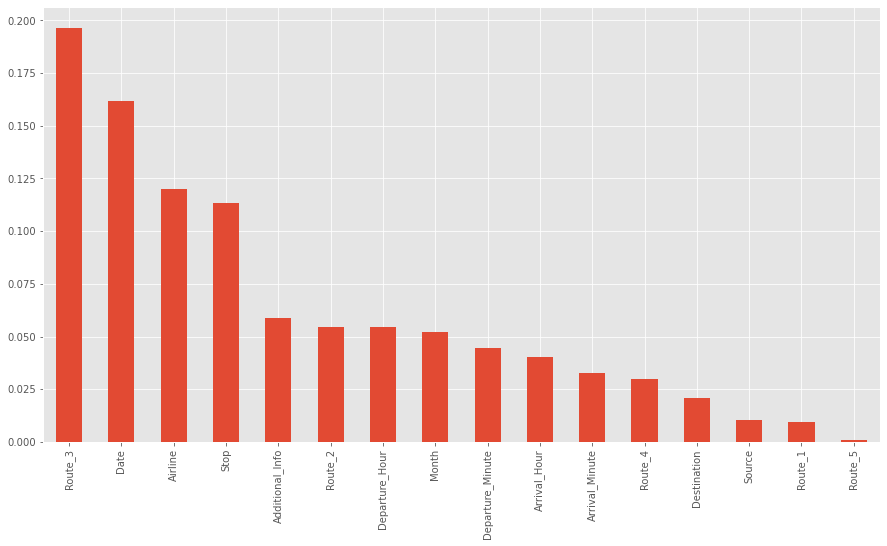

In [57]:
plt.style.use("ggplot")
plt.figure(figsize = (15,8))
feature_importances = pd.Series(etr.feature_importances_, index=x.columns)
feature_importances.nlargest(35).plot(kind='bar')
plt.show()

### Importing our model

In [58]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [59]:
y_pred = reg_rf.predict(x_test)

In [60]:
reg_rf.score(x_train, y_train)

0.9474895190940268

In [61]:
reg_rf.score(x_test, y_test)

0.6190344974643336

C:\Users\ribad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


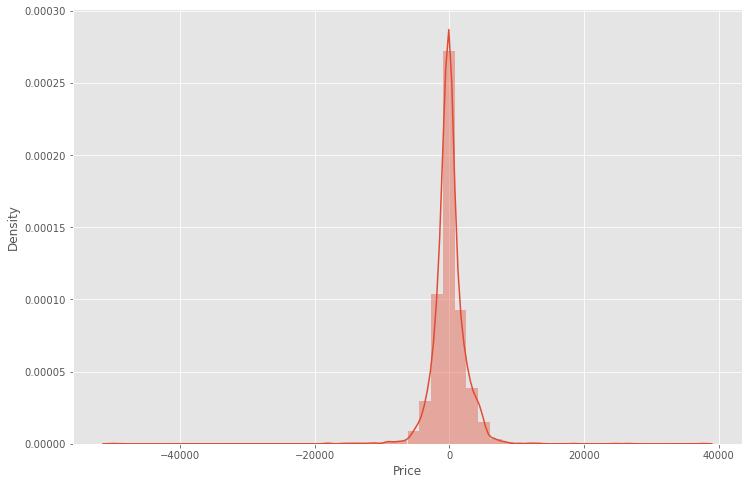

In [62]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test-y_pred)
plt.show()

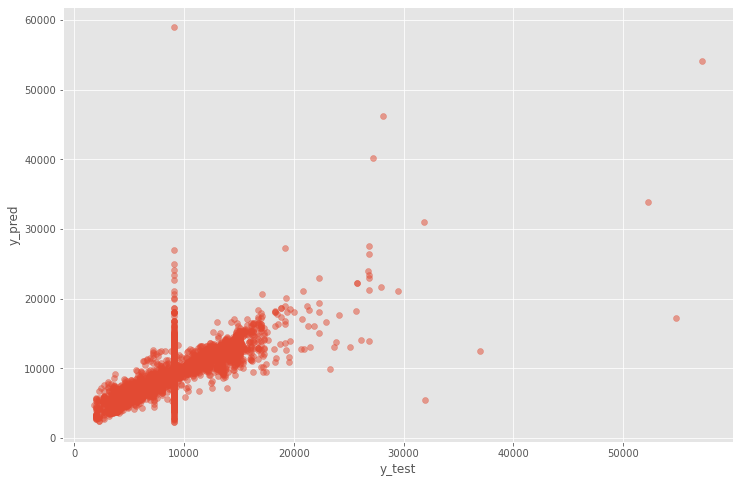

In [63]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [64]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1528.092737066213
MSE: 6333854.799457812
RMSE: 2516.7150811042975


In [65]:
metrics.r2_score(y_test, y_pred)

0.6190344974643336

### Hypertuning our Model

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 7, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3, 5,8, 10]

In [68]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [69]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = param_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5,
                               verbose=2, random_state=42, n_jobs = 3)

In [70]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=3,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5, 8, 10],
                                        'min_samples_split': [2, 3, 5, 7, 10,
                                                              15, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [71]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [72]:
reg_rf = RandomForestRegressor(n_estimators= 700,
 min_samples_split=3,
 min_samples_leaf= 1,
 max_features='sqrt',
 max_depth= 15)

In [73]:
reg_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=3,
                      n_estimators=700)

In [74]:
ypred1= reg_rf.predict(x_test)
ypred1

array([10243.78676138,  9025.95356096,  8671.26872696, ...,
        4426.09667695,  7887.6455463 , 10045.84081034])

C:\Users\ribad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


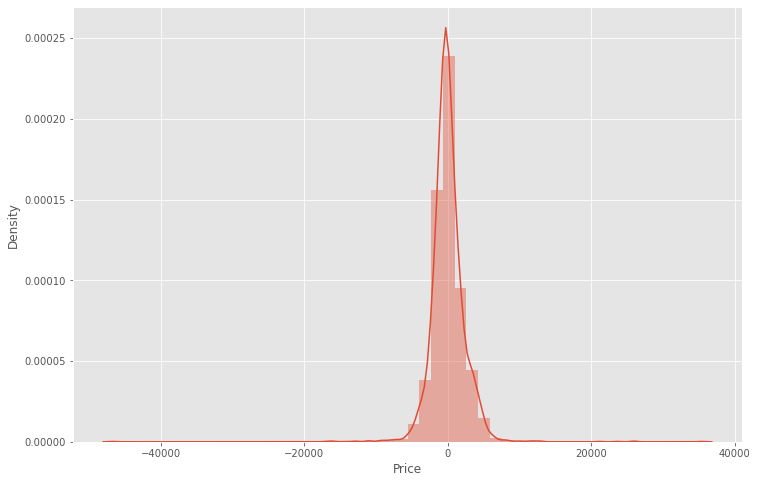

In [75]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test-ypred1)
plt.show()

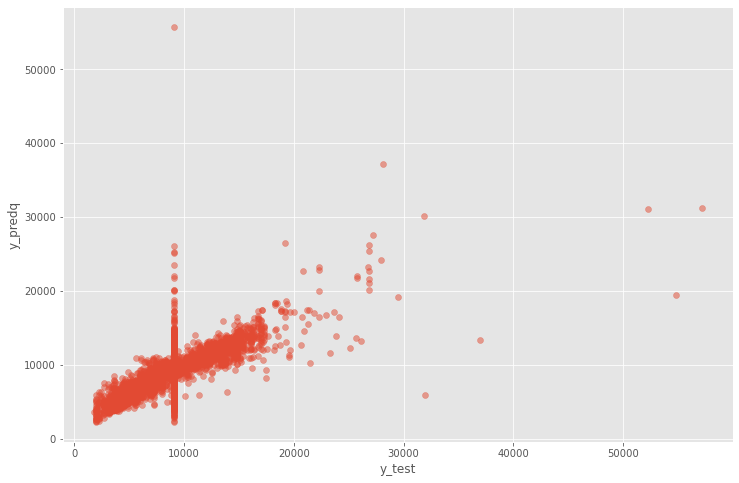

In [76]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
plt.scatter(y_test, ypred1, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_predq")
plt.show()

In [77]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, ypred1))
print('MSE:', metrics.mean_squared_error(y_test, ypred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred1)))

MAE: 1557.4061275926538
MSE: 6098863.800281055
RMSE: 2469.58777942414


In [78]:
metrics.r2_score(y_test, ypred1)

0.6331686175108484